In [166]:
import pandas as pd

train_bin_results= '/mnt/data/CAMI/DNABERT/rand_train.csv'
val_bin_results = '/mnt/data/CAMI/DNABERT/rand_val.csv'

In [167]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

col_names = ['contig_length', 'method', 'randint', 'randintadj']
train_csv = pd.read_csv(train_bin_results, header = None, names=col_names)
train_csv

,contig_length,method,randint,randintadj
0,10000,hdbscan_20_fn_layer12_pca400,0.636129,0.170345
1,5000,hdbscan_20_fn_layer12_pca400,0.612529,0.176103
2,2000,hdbscan_20_fn_layer12_pca500,0.657800,0.247720
3,1000,hdbscan_20_fn_layer12_pca500,0.271612,0.002932
4,500,hdbscan_20_fn_layer12_pca500,0.280059,0.004285
5,0,hdbscan_20_fn_layer12_pca500,0.370651,0.027232


In [164]:
col_names = ['contig_length', 'method', 'randint', 'randintadj']
val_csv = pd.read_csv(val_bin_results, header = None, names=col_names)
val_csv

,contig_length,method,randint,randintadj
0,10000,hdbscan_20_fn_layer12_pca400,0.267950,0.008305
1,5000,hdbscan_20_fn_layer12_pca400,0.412602,-0.000922
2,2000,hdbscan_20_fn_layer12_pca500,0.547972,0.050564
3,1000,hdbscan_20_fn_layer12_pca500,0.591882,0.049133
4,500,hdbscan_20_fn_layer12_pca500,0.253556,0.008748
5,0,hdbscan_20_fn_layer12_pca500,0.407541,-0.003182


In [168]:
train_rand_values = train_csv['randint']
print(train_rand_values)

val_rand_values = val_csv['randint']
print(val_rand_values)

0    0.636129
1    0.612529
2    0.657800
3    0.271612
4    0.280059
5    0.370651
Name: randint, dtype: float64
0    0.267950
1    0.412602
2    0.547972
3    0.591882
4    0.253556
5    0.407541
Name: randint, dtype: float64


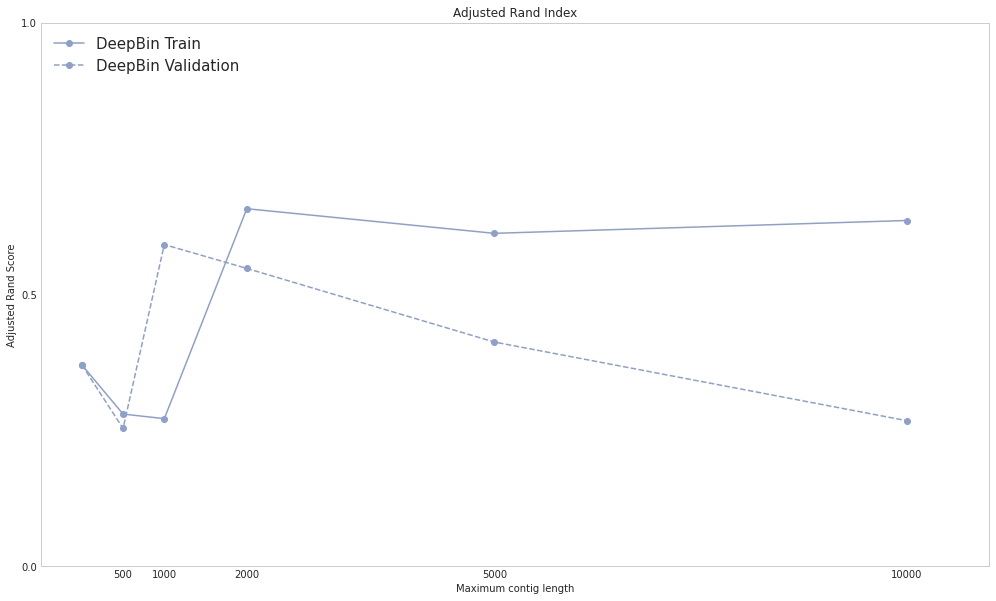

In [172]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import numpy as np

#per_data=genfromtxt('result.csv',delimiter=',')


#tnf_t_x = [500, 1000, 2000, 5000, 10000]
#tnf_t_y = []

#tnf_v_x = [500, 1000, 2000, 5000, 10000]
#tnf_v_y = []

train_x = [0, 500, 1000, 2000, 5000, 10000]
train_y = [train_rand_values[5], train_rand_values[4], train_rand_values[3], train_rand_values[2], train_rand_values[1], train_rand_values[0]]

val_x = [0, 500, 1000, 2000, 5000, 10000]
val_y = [train_rand_values[5], val_rand_values[4], val_rand_values[3], val_rand_values[2], val_rand_values[1], val_rand_values[0]]

plt.figure(figsize=(17, 10))

ax = plt.axes()
ax.grid(False)
plt.title("Adjusted Rand Index")
plt.ylabel("Adjusted Rand Score")
plt.xlabel("Maximum contig length")
#plt.plot(tnf_t_x, tnf_t_y, label = "TNF Train", linestyle='-', marker='o', color=sns.color_palette('Set2')[0])
#plt.plot(tnf_v_x, tnf_v_y, label = "TNF Validation", linestyle='--', marker='o', color=sns.color_palette('Set2')[0])
plt.plot(train_x, train_y, label = "DeepBin Train", linestyle='-', marker='o', color=sns.color_palette('Set2')[2])
plt.plot(val_x, val_y, label = "DeepBin Validation", linestyle='--', marker='o', color=sns.color_palette('Set2')[2])
plt.legend(loc="upper left", prop={'size': 15})
plt.yticks([0,0.5,1]) 
plt.xticks([500, 1000, 2000, 5000, 10000]) 
plt.xlim(-500, 11000)
plt.ylim(0, 1);
plt.show()